In [224]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Read the City and Ride Data
city_data_df = pd.read_csv(os.path.join('data','city_data.csv'))
ride_data_df = pd.read_csv(os.path.join('data','ride_data.csv'))
# Combine the data into a single dataset
ride_data_complete_df = pd.merge(ride_data_df,city_data_df, how='inner', on=['city','city'])
# Display the data table for preview
ride_data_complete_df.sort_values(by=['date','city']).head()
#city_data_df['type'].unique()

,city,date,fare,ride_id,driver_count,type
1313,Liumouth,2018-01-01 00:08:16,37.91,5673666505216,69,Urban
2161,Colemanland,2018-01-01 00:46:46,47.74,2215912677020,23,Suburban
2022,Sotoville,2018-01-01 02:07:24,24.07,7827431948090,10,Suburban
1225,Royland,2018-01-01 03:46:50,7.57,5815378003370,64,Urban
583,West Heidi,2018-01-01 05:23:21,10.75,6571513080673,28,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

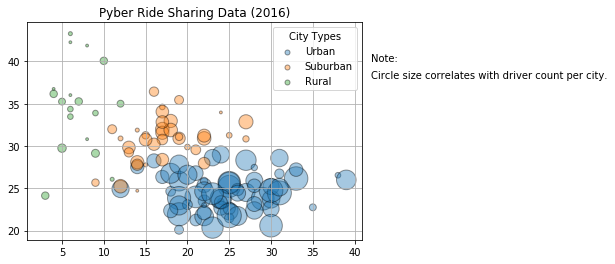

In [234]:

# Obtain the x and y coordinates for each of the three city types
ride_data_complete_gb_city = ride_data_complete_df.groupby(['city','type'])
city_data_gb_city = city_data_df.groupby(['city','type'])

#Create the dataframe for the graph.
ride_sharing_df = pd.DataFrame(ride_data_complete_gb_city['fare'].mean())
ride_sharing_df.rename(inplace=True, columns={'fare':'Average Fare ($)'})
ride_sharing_df.index.names = ['City', 'City Type']
ride_sharing_df['Total Number of Rides (Per City)'] = ride_data_complete_gb_city['ride_id'].count()
ride_sharing_df['Driver Count (Per City)'] = city_data_gb_city['driver_count'].sum()
ride_sharing_df.head()
ride_sharing_df = ride_sharing_df.reset_index()

#Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)

#Turn on the grid
axes.grid()

# Build the scatter plots for each city types
for citytype in ride_sharing_df['City Type'].unique():
    temp_df = ride_sharing_df[ride_sharing_df['City Type'] == citytype]
# Incorporate the other graph properties
    axes.scatter(x=temp_df['Total Number of Rides (Per City)'], \
                                                 y=temp_df['Average Fare ($)'], \
                                                 s= [n*8 for n in temp_df['Driver Count (Per City)']], \
                                                 label=citytype, \
                                                 edgecolors='black', alpha=.4
                                                )
# Plot title
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legnd_handler = plt.legend(title='City Types')
legnd_handler.legendHandles[0]._sizes = [25]
legnd_handler.legendHandles[1]._sizes = [25]
legnd_handler.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(42,40, 'Note:')
plt.text(42,38, 'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig(os.path.join('../Images', 'ride_sharing_graph'))
# Show Figure
plt.show()

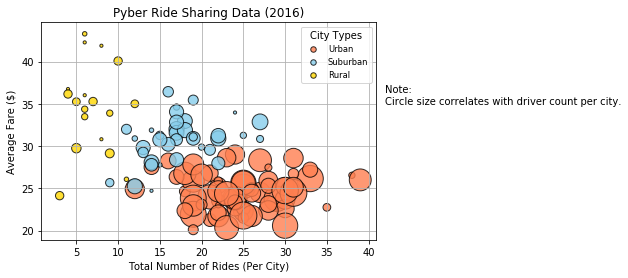

## Total Fares by City Type

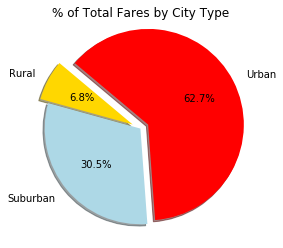

In [333]:
#Create the dataframe for the graph.
ride_data_complete_gb_type = ride_data_complete_df.groupby(['type'])

fares_by_type_df = pd.DataFrame(ride_data_complete_gb_type['fare'].sum())
fares_by_type_df.rename(inplace=True, columns={'fare':'Total Fares'})
fares_by_type_df.index.names = ['City Type']
fares_by_type_df = fares_by_type_df.reset_index()

# Calculate Type Percents
fares_by_type_df['Percentage'] = (fares_by_type_df['Total Fares']/fares_by_type_df['Total Fares'].sum())*100

# Build Pie Chart
#Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)
explode = (.1, 0, .1) 
colors=['gold','lightblue','red']
axes.pie(fares_by_type_df['Percentage'], \
         labels=fares_by_type_df['City Type'], \
         explode=explode, colors=colors, \
         autopct='%1.1f%%', shadow=True, startangle=140, \
         radius = 1.1, labeldistance = 1.15, pctdistance=.6
        )


plt.title('% of Total Fares by City Type', pad = 3.0)

# Save Figure
plt.savefig(os.path.join('../Images', 'fares_by_city_graph'))

#Show Figure
plt.show()

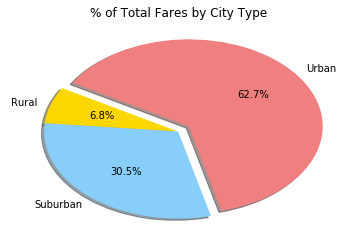

## Total Rides by City Type

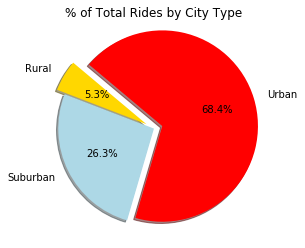

In [334]:
# Calculate Ride Percents
rides_by_city_type_df = ride_data_complete_gb_type['ride_id'].count()
# Build Pie Chart

rides_by_city_type_df.index.names = ['City Type']
rides_by_city_type_df = rides_by_city_type_df.reset_index()
rides_by_city_type_df.rename(inplace=True, columns={'ride_id':'Ride Count'})
rides_by_city_type_df

# Calculate Type Percents
rides_by_city_type_df['Percentage'] = (rides_by_city_type_df['Ride Count']/rides_by_city_type_df['Ride Count'].sum())*100

# Build Pie Chart
# Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)
explode = (.1, 0, .1) 
colors=['gold','lightblue','red']
axes.pie(rides_by_city_type_df['Percentage'], \
         labels=rides_by_city_type_df['City Type'], \
         explode=explode, colors=colors, \
         autopct='%1.1f%%', shadow=True, startangle=140, \
         radius = 1.1, labeldistance = 1.15, pctdistance=.6
        )


plt.title('% of Total Rides by City Type', pad = 3.0)

# Save Figure
plt.savefig(os.path.join('../Images', 'rides_by_city_graph'))

#Show Figure
plt.show()

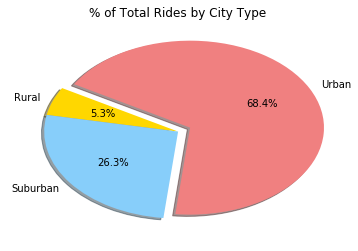

## Total Drivers by City Type

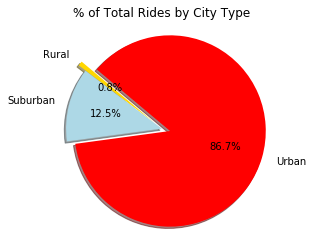

In [347]:
# Calculate Driver Percents

# Build Pie Charts


# Calculate Ride Percents
drivers_by_city_type_df = ride_data_complete_gb_type['driver_count'].sum()

drivers_by_city_type_df.index.names = ['City Type']
drivers_by_city_type_df = drivers_by_city_type_df.reset_index()
drivers_by_city_type_df.rename(inplace=True, columns={'driver_count':'Driver Count'})
drivers_by_city_type_df.head()

# Calculate Type Percents
drivers_by_city_type_df['Percentage'] = \
    (drivers_by_city_type_df['Driver Count']/drivers_by_city_type_df['Driver Count'].sum())*100

# # Build Pie Chart
# #Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)
explode = (.1, 0, .1) 
colors=['gold','lightblue','red']
axes.pie(drivers_by_city_type_df['Percentage'], \
         labels=drivers_by_city_type_df['City Type'], \
         explode=explode, colors=colors, \
         autopct='%1.1f%%', shadow=True, startangle=140, \
         radius = 1.1, labeldistance = 1.15, pctdistance=.6
        )


plt.title('% of Total Rides by City Type', pad = 3.0)

# Save Figure
plt.savefig(os.path.join('../Images', 'drivers_by_city_graph'))

# Show Figure
plt.show()


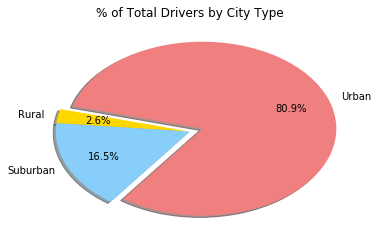